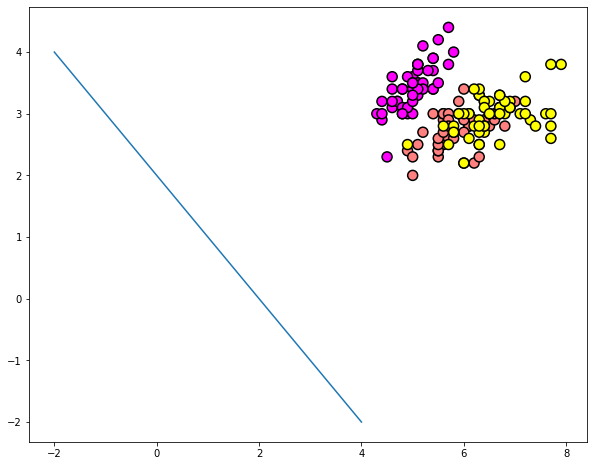

In [19]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn import neighbors, datasets
iris = load_iris()


np.seed = 7
#first class
#train_data = np.random.normal(size=(100,2))
#train_labels = np.zeros(100)
train_data = iris.data[:,:2]
train_labels = iris.target
#sec class
#train_data = np.r_[train_data,np.random.normal(size=(100,2),loc=2)]
#train_labels = np.r_[train_labels,np.ones(100)]



plt.rcParams['figure.figsize']=(10,8)
plt.scatter(train_data[:,0],train_data[:,1],c=train_labels,s=100,cmap='spring',edgecolors='black',
            linewidths=1.5);
plt.plot(range(-2,5),range(4,-3,-1));

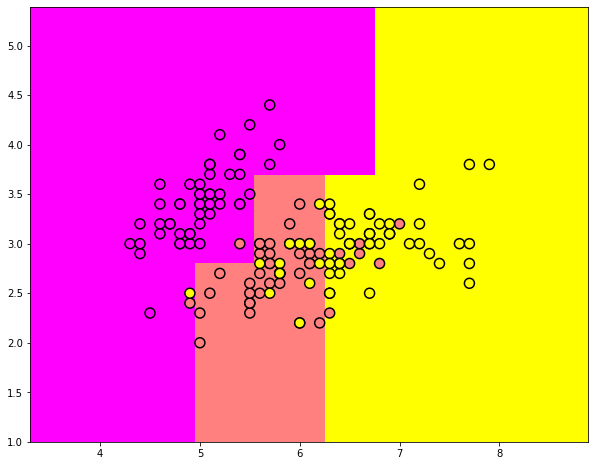

In [20]:
from sklearn.tree import DecisionTreeClassifier
#функци, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1    
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
#maxdepth-max glubina
clf_tree = DecisionTreeClassifier(criterion='entropy',  max_depth=3, random_state=17)
#обучаем дерево
clf_tree.fit(train_data,train_labels)

xx, yy = get_grid(train_data)   
predicted = clf_tree.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted,cmap='spring')
plt.scatter(train_data[:,0],train_data[:,1],c=train_labels,s=100,cmap='spring',edgecolors='black',
            linewidths=1.5);

In [ ]:
# используем .dot формат для визуализации дерева
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file='../../img/small_tree.dot', filled=True)
!dot -Tpng '../../img/small_tree.dot' -o '../../img/small_tree.png'